!pip install flake8 pycodestyle_magic
%load_ext pycodestyle_magic
%pycodestyle_on## $\Large{Pandas\; Tutorial\; (part2)}$

已經習慣了Pandas的操作了嗎? 在這個部分，我們會介紹一些更實用的功能，例如如何進行一些基本的描述性統計、製作樞紐分析表、以及畫統計圖表。在講解完後你會發現光使用Pandas套件就可以完成幾乎所有在資料探索上會使用到的功能，可以感受到Pandas的厲害之處了嗎? 就讓我們繼續看下去吧。

## [Panda官方手冊](https://pandas.pydata.org/pandas-docs/stable/#0)

In [1]:
!pip install flake8 pycodestyle_magic
%load_ext pycodestyle_magic
%pycodestyle_on

### 本章節內容大綱
* [在DataFrame中進行數值統計](#在DataFrame中進行數值統計)
    - [加總、計數、以及其他統計量](#加總、計數、以及其他統計量)
    - [遺漏值](#遺漏值)
* [DataFrame進階用法](#DataFrame進階用法)
    - [apply功能的使用](#apply功能的使用)
    - [群組(groupby)的使用](#群組的使用)
    - [pivot_table的使用](#pivot_table的使用)
* [使用DataFrame繪製統計圖](#使用DataFrame繪製統計圖)

## 載入套件

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

## 載入第二部分使用到的資料集

In [3]:
# 載入範例的資料集，這次我們使用的是鐵達尼號的資料，後續在機器學習領域上會很常見到這份資料集
df = pd.read_csv('dataset/titanc_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a name="在DataFrame中進行數值統計"></a>
## 在DataFrame中進行數值統計

在資料分析的過程中，我們會希望將整份資料或特定欄位做一個整體趨勢的說明，而不是直接把所有資料湊到別人的鼻子下請他們自己看，如何用簡單的方式描述資料我們得利用到統計學上的一些統計量。別擔心，很多其實我們應該已經耳熟能詳了，更進階的統計概念我們也會在之後的統計學單元傳授給大家。現在就讓我們先來看一下如何對dataframe這類的資料做數值統計吧。

<a name="加總、計數、以及其他統計量"></a>
- ### 加總、計數、以及其他統計量

如同numpy中的np.sum(), np.mean()，在Pandas中我們也使用類似的方法做計算。

In [4]:
# 先觀察一下前五筆資料
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 計算Survived的平均次數
df['Survived'].mean()

0.3838383838383838

In [6]:
# 計算Fare的最大值
df['Fare'].max()

512.3292

In [7]:
# 若欄位是字串之類的類別變項，我們可以使用.value_counts()觀察各個類別的出現次數
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
# 若不想一個一個欄位觀察，直接使用df.mean()會呈現所有pandas覺得可以做平均數的欄位平均
# 需要注意的是有些以數值做編碼的類別變項(ex. Pclass)也會被當作連續變項來看待因而納入
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# 更簡單的做法是使用df.describe()，pandas會自動將特定類型的欄位做一個摘要
# 在連續型欄位上會呈現較常用的一些統計量
df.describe(include='number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# 在類別型欄位會呈現計數、有幾個類別、以及出現最多次類別的頻率等資訊
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Van Impe, Mr. Jean Baptiste",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


<a name="遺漏值"></a>
- ### 遺漏值

除了上面提到的數值、類別、時間之外，後續大家還會遇到的特殊資料型態是**遺漏資料**，意思是我們並不知道某些資料在某些欄位的數值，會出現這種情況的原因也有非常多種(比較常見的是在資料收集上出現問題、或是在概念上本來某些資料就不會有這個欄位的數值等等)。在Numpy與Pandas兩個套件中，遺漏資料常以**NaN**表示，意思是Not a Number，接下來讓我們示範一下如何找到資料中的遺漏值以及做一些處理。

In [11]:
# 使用df.info()觀察資料整體狀況
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df['Age'].isna()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [13]:
# 使用isna()方法判斷Age是否為遺漏值，且挑出Age為遺漏值的前5筆資料
df[df['Age'].isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


從資訊中我們發現有部分欄位的資料筆數並非891筆，這代表資料中有一些遺漏的資料，例如Age欄位只有714筆資料，而Cabin欄位甚至只有204筆資料，另外觀察前五筆資料也可以明顯看到Cabin中有些欄位顯示NaN，這就代表在這筆資料的這個欄位的數值為遺漏值。

了解到資料中有遺漏後又該怎麼處理呢?最常使用的方式是直接刪除遺漏資料或是補值，以下我們來示範應該如何做這些處理。

In [14]:
# 只要任何一個欄位有遺漏資料，使用dropna就會將其剔除
delete_na_df = df.dropna()

# 使用shape觀察資料筆數可以發現完全無遺漏值的資料只剩下183筆
print(delete_na_df.shape)

(183, 12)


In [15]:
# 先複製一份以免改動到原本資料
fill_na_df = df.copy()

# 事先計算年齡的平均
mean_age = df['Age'].mean()

# 使用fillna方法將遺漏值取代為特定的數值
fill_na_df['Age'].fillna(value=mean_age, inplace=True)

# 再以info看一次資料的狀況，Age欄位現在是不是沒有遺漏值了?
fill_na_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
<a name="DataFrame進階用法"></a>
## DataFrame進階用法

在第一部分時我們介紹了如何在dataframe中挑選、排序、增加/刪除欄位、以及合併兩個或多個資料表，然而Pandas的功能還萬萬不只這樣。這個部份我們將會額外介紹三個好用的方法，分別為apply, groupby, 以及pivot_table。

<a name="apply功能的使用"></a>
- ### apply功能的使用

相對而言apply的使用方式並沒有那麼的直觀，但你可以想像它是另一種形式的迴圈，它可以依照每個小分組(通常是一欄或一列，但我們也可以搭配著groupby使用)重複地執行同一個函數，例如在以下的例子當中，我們使用apply去計算Age與Fare的平均數是多少，然而apply更強大的功能是可以放入自己定義的函數做運算。

In [16]:
# 挑選出Age與Fare欄位並且用apply計算每個欄位的平均
# 還記得axis的用法嗎? axis=0代表我們將第一個軸(row)的數值視為同一群，第二個軸(column)的數值則分開計算
df[['Age', 'Fare']].apply(np.mean, axis=0)

Age     29.699118
Fare    32.204208
dtype: float64

In [17]:
# 挑選出Age與Fare欄位並且以apply計算每筆資料的平均
# 在此我們設定axis=1去計算每筆資料在這兩個欄位的平均，雖然這個數值在解釋上並無任何意義
df[['Age', 'Fare']].apply(np.mean, axis=1).head()

0    14.62500
1    54.64165
2    16.96250
3    44.05000
4    21.52500
dtype: float64

In [18]:
# 我們也可以自行定義一個函數並且使用apply去做計算
# 在此我們使用年齡與性別去決定每個乘客的身分

def get_identity(df):
    if df['Sex'] == 'male':
        if df['Age'] < 18:
            return 'Child'
        else:
            return 'Man'
    elif df['Sex'] == 'female':
        if df['Age'] < 18:
            return 'Child'
        else:
            return 'Woman'


# 依據每個row執行get_identity這個函數，並將結果儲存至新的identity欄位
df['identity'] = df.apply(get_identity, axis=1)

# 觀察前20筆資料的結果
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,identity
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Man
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Man
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Man
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Woman
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Child


<a name="群組的使用"></a>
- ### 群組的使用

在比較進階的資料處理上，我們會希望針對每個不同的類別分別了解他們的特性，例如希望依據縣市計算出各區域的人民平均月薪，這個時候groupby就可以派上用場。在此我們同樣以鐵達尼號的乘客資料進行示範。

In [19]:
# 依照上船港口(Embarked)欄位做群組，挑選出票價並且計算平均
df.groupby(by='Embarked')['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [20]:
# 依照上船港口(Embarked)與性別(Sex)計算各欄位的資料數量(如果欄位內沒有遺漏值的話可以將這個數量作為人次來看)
df.groupby(by=['Embarked', 'Sex']).count()

PassengerId  Survived  Pclass  Name  Age  SibSp  Parch  \
Embarked Sex                                                              
C        female           73        73      73    73   61     73     73   
         male             95        95      95    95   69     95     95   
Q        female           36        36      36    36   12     36     36   
         male             41        41      41    41   16     41     41   
S        female          203       203     203   203  186    203    203   
         male            441       441     441   441  368    441    441   

                 Ticket  Fare  Cabin  identity  
Embarked Sex                                    
C        female      73    73     37        73  
         male        95    95     32        95  
Q        female      36    36      2        36  
         male        41    41      2        41  
S        female     203   203     56       203  
         male       441   441     73       441

除了直接使用groupby搭配常見的統計值之外，我們同樣也可以在groupby後加上apply做運算，此時apply會將指定欄位中類別相同的資料視為同一組做一次運算。

In [21]:
# 自定義計算資料中遺漏值總數的函數

def total_na_number(df):
    return df.isna().sum()


# 依據艙等(Pclass)欄位將資料分組，並分別計算各欄位的遺漏數總數
df.groupby(by='Pclass').apply(total_na_number)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,identity
Pclass,,,,,,,,,,,,,
1,0,0,0,0,0,30,0,0,0,0,40,2,0
2,0,0,0,0,0,11,0,0,0,0,168,0,0
3,0,0,0,0,0,136,0,0,0,0,479,0,0


<a name="pivot_table的使用"></a>
- ### pivot_table的使用

在這邊要講的最後一個函數叫做pivot_table，在功能上對應的是excel中的樞紐分析表，因此它可以彈性地以你想要的方式合併不同組別的資料並且整理成新的表格樣式。

In [22]:
# 以pivot_table方法將資料做總別，設定性別(Sex)的各個類別為列、艙等(Pclass)的各個類別為欄、並且計算每個組別下票價(Fare)的平均。
df.pivot_table(values='Fare', index='Sex', columns='Pclass', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,106.125798,21.970121,16.118810
male,67.226127,19.741782,12.661633


---
<a name="使用DataFrame繪製統計圖"></a>
## 使用DataFrame繪製統計圖

雖然用統計量去描述資料是一件非常方便的事情，但由於數字非常抽象，有時卻又會很難了解資料比較詳細的狀況。還有沒有甚麼辦法可以讓我們瞭解資料呢? 這時候資料的視覺化就派上用場了，在後面一個單元我們將會教大家如何使用另外一個matplotlib套件對圖形做更細部的調整，然而在此我們先來看看Pandas套件內所提供的繪圖函數吧。

- ### 連續變項的統計圖

在觀察單一連續變項的資料上，我們常使用直方圖、機率密度函數圖、以及盒型圖做繪製，以下我們分別呈現如何使用pandas繪製這三種統計圖。

#### 直方圖

直方圖會把資料依據數值大小分成幾個組別，再將各組的資料筆數繪製成圖，這也是大家日常生活中最常見的統計圖之一。

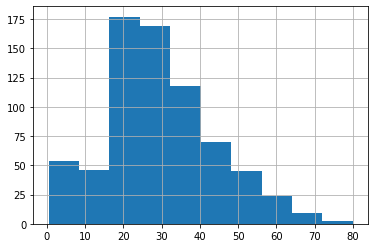

In [23]:
# 以直方圖繪製資料中年齡的分布
df['Age'].hist()

#### 機率密度函數圖

有別於將資料做離散化的分組，機率密度函數圖假設資料在各個數值上的出現機率是連續的，並且嘗試透過手上的資料估計最可能的出現機率密度為何，因此在縱軸上將會從出現的頻率改為機率密度的數值。然而在使用情境上大致與直方圖相同，都是描述資料的分布狀況。

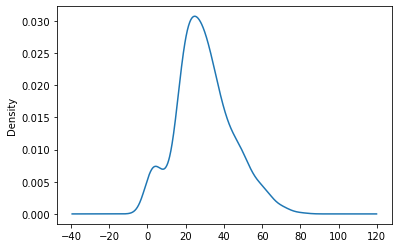

In [24]:
# 以機率密度函數圖繪製資料中年齡的分布
df['Age'].plot.kde()

#### 盒型圖

又被稱為箱型圖，圖中的幾個端點都具有統計意義，因此除了資料分佈之外也可以快速得到幾個關鍵的統計量與資料中的極端值。也因為箱型圖在視覺上非常簡潔，在做多個欄位的分布比較時很被用到。

<img src="https://drive.google.com/uc?export=view&id=1yx9Hh_zNOYLrX1LbRdLYRi_IGXkghex8" width=700/>

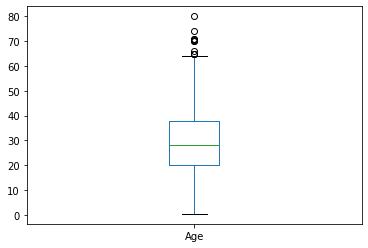

In [25]:
# 將資料中年齡的分布以盒型圖繪製
df['Age'].plot.box()

- ### 類別變項的統計圖

由於類別變項無法用連續的數值表示，上述所提到的三個圖形都不適合做類別變項的探索。若要了解類別變項的資料分布狀況，我們會使用長條圖或是圓餅圖做視覺上的呈現。

#### 長條圖

長條圖與直方圖長相類似，因此很容易被搞錯。兩者差異在於直方圖呈現的是連續型的資料，因此圖形會相互連接；而長條圖呈現的是類別型的資料，因此類別與類別之間將會有間隔。

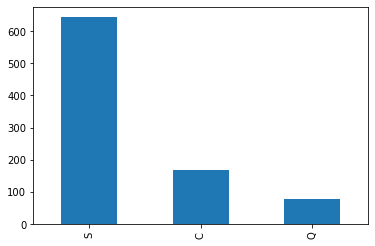

In [26]:
# 繪製上船港口(Embarked)的長條圖
# 首先需要計算每個類別的出現次數
embarked_counts = df['Embarked'].value_counts()

# 再將出現次數繪製長條圖
embarked_counts.plot.bar()

In [27]:
embarked_counts

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### 圓餅圖

相較於呈現出現次數，圓餅圖呈現的是各類別的相對比例，由於它在視覺上相對美觀因此常被使用，然而圓餅圖有許多缺點，例如類別之間微小的比例差異難以直接從圖形呈現、或是不適合用於呈現多個類別的比例狀況，因此在使用上必須小心謹慎。

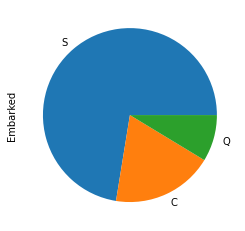

In [28]:
# 繪製上船港口(Embarked)的圓餅圖
# 首先需要計算每個類別的出現次數
embarked_counts = df['Embarked'].value_counts()

# 再將出現次數繪製圓餅圖
embarked_counts.plot.pie()

- ### 觀察欄位之間的關聯

除了了解單一變項的資料分布狀況外，我們也會觀察不同欄位之間的關係，同樣地，圖形的選擇也會依照欄位的性質而有所不同，在此我們針對散佈圖與群組盒型圖兩種圖表作介紹。

#### 散佈圖

散佈圖適合的欄位類型為兩個連續的變項，我們可以以直接的方式觀察兩個欄位數值之間的關聯。

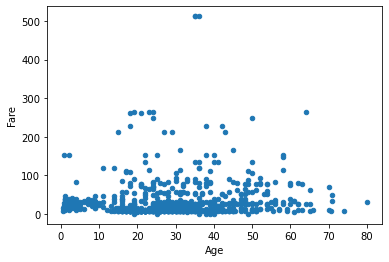

In [29]:
# 針對年齡(Age)與票價(Fare)繪製散佈圖
df.plot.scatter(x='Age', y='Fare')

#### 群組盒型圖

若兩個欄位之一為類別型的變項，我們常會以群組盒型圖作資料分布的比較。

/opt/conda/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


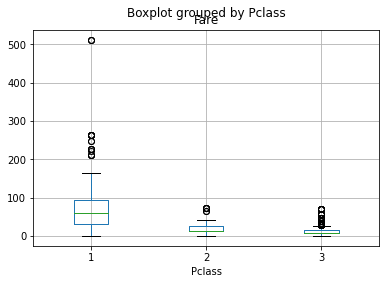

In [30]:
# 針對票價(Fare)與艙等(Pclass)繪製群組盒型圖
df.boxplot(column='Fare', by='Pclass')

## Pandas小結

希望在這兩個部份的教學後，大家可以對如何在python中處理表格類型資料有一個初步的了解。然而Pandas套件仍然有其他強大的功能，在此無法一一講解，後續大家在實務上遇到問題時不妨多參考官方文件的介紹、或是搜尋各大論壇大家對於特定功能的討論或解答唷。

- [Pandas官方文件](https://pandas.pydata.org/pandas-docs/stable/index.html)